In [13]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [23]:

# 1. Đọc dữ liệu từ file CSV
data = pd.read_csv("house_prices.csv")

# 2. Xem trước dữ liệu
print("📊 Dữ liệu mẫu:")
print(data.head())

📊 Dữ liệu mẫu:
   Area  Bedrooms  Age   Price
0  2100         3   20  500000
1  1600         2   15  330000
2  2400         4   10  550000
3  3000         4    5  620000
4  1800         3    8  400000


In [24]:
# 3. Xác định biến độc lập (X) và biến phụ thuộc (y)
X = data[["Area", "Bedrooms", "Age"]]  # Biến đầu vào
y = data["Price"]                      # Biến mục tiêu

# 4. Chia dữ liệu thành tập huấn luyện và kiểm tra (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 5. Tạo và huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, y_train)

# 6. Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# 7. Đánh giá mô hình
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n✅ Mean Squared Error (MSE): {mse:.2f}")
print(f"✅ R^2 Score: {r2:.2f}")


✅ Mean Squared Error (MSE): 750554681.76
✅ R^2 Score: 0.90



📈 Hệ số hồi quy:
Area: 144.46
Bedrooms: 32592.29
Age: -2775.31
Intercept (β₀): 97769.05


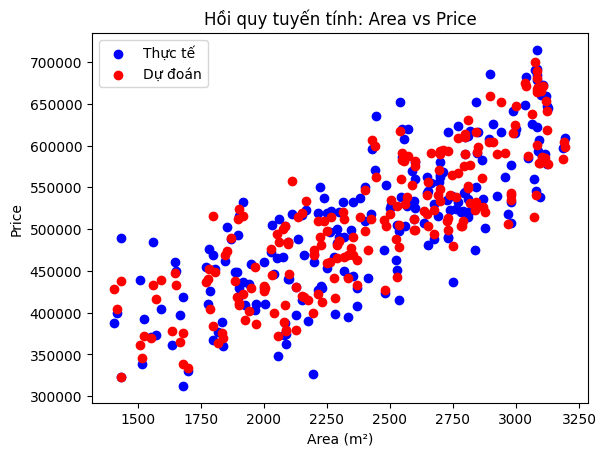

In [25]:
# 8. Hiển thị hệ số hồi quy và hệ số chặn
print("\n📈 Hệ số hồi quy:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.2f}")
print(f"Intercept (β₀): {model.intercept_:.2f}")

# 9. Vẽ đồ thị scatter và đường dự đoán cho 1 biến (ví dụ: Area)
plt.scatter(X_test["Area"], y_test, color="blue", label="Thực tế")
plt.scatter(X_test["Area"], y_pred, color="red", label="Dự đoán")
plt.title("Hồi quy tuyến tính: Area vs Price")
plt.xlabel("Area (m²)")
plt.ylabel("Price")
plt.legend()
plt.show()